In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [4]:
dataset = MNIST('', download=False)

In [5]:
len(dataset)

60000

In [10]:
import torchvision.transforms as transforms
ds = MNIST(root='', 
                train=True,
                transform=transforms.ToTensor())

In [11]:
img_tensor, label = ds[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [14]:
test_ds = MNIST('', train=False)
len(test_dataset)

10000

In [34]:
print(img_tensor[0,10:15,10:15])

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])


In [35]:
print(torch.max(img_tensor), torch.min(img_tensor))

tensor(1.) tensor(0.)


5
torch.Size([1, 28, 28])


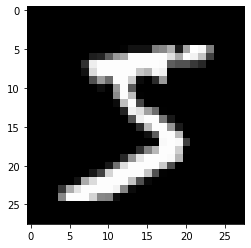

In [51]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0,], cmap='gray')
print(label)
print(img_tensor.shape)

2


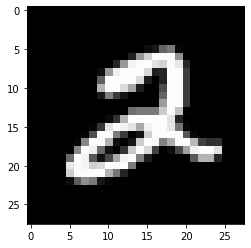

In [62]:
import matplotlib.pyplot as plt
plt.imshow(ds[5][0][0], cmap='gray')
print(ds[5][1])
#its a 5d array 
# 1a is 6000d array holding all data 
# 2a is 2d holds image & label
# 3a holds 1 array of 28 arrays of 28 elements

In [63]:
from torch.utils.data import random_split
train_ds, val_ds = random_split(ds, [50000,10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [64]:
from torch.utils.data import DataLoader
batch_size=128
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [68]:
import torch.nn as nn
i_s = 28*28
n_c = 10

model = nn.Linear(i_s, n_c)
#entering vector input bcoz Linear model
# n_c indicates output classes - classification
#sample premade model

In [69]:
print(model.weight.shape)
model.weight
#model weights

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0128,  0.0311,  0.0260,  ..., -0.0335, -0.0008,  0.0099],
        [ 0.0112,  0.0207, -0.0182,  ..., -0.0341, -0.0256, -0.0224],
        [-0.0290, -0.0072,  0.0320,  ...,  0.0117,  0.0009, -0.0011],
        ...,
        [ 0.0103, -0.0327, -0.0281,  ...,  0.0159,  0.0163, -0.0137],
        [ 0.0278,  0.0238, -0.0191,  ..., -0.0349,  0.0064,  0.0255],
        [ 0.0258,  0.0203, -0.0320,  ..., -0.0147, -0.0246,  0.0293]],
       requires_grad=True)

In [70]:
print(model.bias.shape)
model.bias
#model attrs

torch.Size([10])


Parameter containing:
tensor([-0.0295, -0.0044, -0.0319, -0.0126,  0.0119, -0.0296, -0.0335, -0.0048,
        -0.0262,  0.0325], requires_grad=True)

In [72]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    break

tensor([1, 3, 8, 4, 4, 5, 5, 0, 8, 9, 7, 1, 9, 4, 0, 3, 0, 5, 7, 8, 5, 7, 0, 7,
        7, 7, 6, 6, 8, 5, 6, 6, 2, 1, 7, 3, 6, 0, 8, 5, 4, 7, 1, 6, 6, 0, 1, 8,
        7, 1, 5, 5, 8, 9, 0, 7, 0, 7, 4, 0, 4, 4, 2, 6, 4, 5, 2, 2, 4, 8, 5, 6,
        0, 1, 6, 3, 5, 3, 3, 8, 4, 8, 8, 7, 9, 2, 2, 2, 8, 1, 2, 0, 2, 4, 4, 0,
        2, 1, 2, 6, 4, 4, 5, 8, 1, 1, 6, 0, 9, 6, 5, 4, 5, 4, 7, 9, 3, 6, 2, 2,
        4, 8, 6, 2, 4, 6, 2, 9])
torch.Size([128, 1, 28, 28])


In [74]:
images.shape
# 128 is batch_size, 1 image contains 28 * 28 pixels

torch.Size([128, 1, 28, 28])

In [75]:
images.reshape(128,784).shape

torch.Size([128, 784])

In [76]:
class Mnistmodel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(i_s, n_c)
    
    def forward(self, xb):
        xb = xb.reshape(-1,784)
        out = self.linear(xb)
        return out
    
model = Mnistmodel()    

In [77]:
print(model)

Mnistmodel(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)


In [78]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [79]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())
#nn models have to contain input size outside of batch 
#batch will be 1st arg in an array
# nn models have to classification classes

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0036, -0.0019,  0.0266,  ..., -0.0314, -0.0147, -0.0184],
         [-0.0027, -0.0172,  0.0074,  ...,  0.0113,  0.0061,  0.0355],
         [-0.0250, -0.0165,  0.0110,  ..., -0.0116,  0.0014,  0.0068],
         ...,
         [-0.0250, -0.0233, -0.0307,  ...,  0.0328,  0.0190,  0.0044],
         [-0.0338, -0.0102,  0.0088,  ...,  0.0047,  0.0317,  0.0084],
         [-0.0297, -0.0075, -0.0038,  ..., -0.0256,  0.0334,  0.0266]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0230, -0.0126, -0.0205,  0.0009, -0.0192,  0.0344, -0.0343, -0.0294,
         -0.0225,  0.0292], requires_grad=True)]

In [83]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    #will break after 1 iter
    break
# we pass images shaped (128,1,28,28) to our linear model
# it goes to forward which reshapes it to -1,784 
# (-1,784) used as 1arg and 10 second arg provided
# this maps to the model because we declared it in advance
# it outputs (128,10)
# as shown below output has data of 10 els
print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[2].data)    

# How does it know what classifications will be

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([-0.3234, -0.0501,  0.1421, -0.1000,  0.1412,  0.1931,  0.4718,  0.2098,
         0.2095, -0.3059])


In [85]:
import torch.nn.functional as F

In [91]:
probs = F.softmax(outputs,dim=1)
print('sample probabilities:\n', probs[2].data)
print("Sum: ", torch.sum(probs[2]).item())

#softmax converts all outputs to probabalities
# .data returns only data array without grad function

sample probabilities:
 tensor([0.0664, 0.0872, 0.1057, 0.0830, 0.1056, 0.1113, 0.1470, 0.1131, 0.1131,
        0.0675])
Sum:  0.9999999403953552


In [87]:
max_probs, preds = torch.max(probs, dim=1)
# weird variable mapping
# returns a tensor of 128 probs 
# preds returns a 128 tensor of max prob label

In [92]:
print(len(max_probs))
print(preds)

128
tensor([4, 5, 6, 5, 7, 5, 2, 5, 0, 7, 8, 8, 6, 4, 6, 2, 4, 8, 8, 5, 2, 8, 9, 8,
        6, 7, 5, 4, 4, 6, 2, 2, 5, 8, 5, 8, 2, 7, 6, 2, 8, 4, 4, 6, 6, 2, 4, 8,
        7, 8, 8, 6, 8, 4, 2, 4, 5, 6, 8, 8, 8, 5, 4, 2, 2, 2, 2, 5, 7, 7, 2, 8,
        2, 5, 4, 8, 6, 5, 5, 5, 2, 2, 2, 5, 8, 4, 2, 5, 8, 4, 6, 2, 5, 7, 7, 6,
        8, 2, 4, 6, 5, 8, 4, 4, 2, 2, 2, 2, 9, 5, 5, 8, 7, 5, 7, 5, 4, 2, 4, 4,
        2, 4, 9, 4, 5, 4, 8, 5])


In [97]:
def accuracy(outputs,labels):
    _, preds = torch.max(outputs,dim=1)
    return torch.tensor(torch.sum(preds ==labels).item() / len(preds))

In [98]:
accuracy(outputs, labels)

tensor(0.1094)

In [100]:
loss_fn = F.cross_entropy
loss = loss_fn(outputs,labels)
print(loss)

tensor(2.3173, grad_fn=<NllLossBackward>)


In [164]:
import torch.optim as optim
def fit(epochs,lr, model, train_loader, val_loader ):
    optimizer = optim.SGD(model.parameters(),lr)
    history = []
    
    for epoch in range(epochs):
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history    


In [165]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [170]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(i_s, n_c)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    def training_step(self,batch):
        images,labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        return loss
    def validation_step(self,batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc=accuracy(out,labels)
        return {'val_loss':loss,'val_acc':acc}
    def validation_epoch_end(self,outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_losses= torch.stack(batch_losses).mean()
        batch_acc = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_acc).mean()
        return {'val_loss':epoch_losses.item(), 'val_acc':epoch_acc.item()}
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

model = MnistModel()        

In [171]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.3326454162597656, 'val_acc': 0.06912579387426376}

In [172]:
model.parameters()

<generator object Module.parameters at 0x7ffa8e4c5c10>

In [173]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9571, val_acc: 0.6385
Epoch [1], val_loss: 1.6850, val_acc: 0.7353
Epoch [2], val_loss: 1.4822, val_acc: 0.7632
Epoch [3], val_loss: 1.3293, val_acc: 0.7821
Epoch [4], val_loss: 1.2119, val_acc: 0.7951


In [174]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1197, val_acc: 0.8042
Epoch [1], val_loss: 1.0457, val_acc: 0.8112
Epoch [2], val_loss: 0.9852, val_acc: 0.8172
Epoch [3], val_loss: 0.9349, val_acc: 0.8216
Epoch [4], val_loss: 0.8924, val_acc: 0.8258


In [175]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8560, val_acc: 0.8294
Epoch [1], val_loss: 0.8245, val_acc: 0.8337
Epoch [2], val_loss: 0.7969, val_acc: 0.8385
Epoch [3], val_loss: 0.7725, val_acc: 0.8407
Epoch [4], val_loss: 0.7508, val_acc: 0.8432


In [176]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7313, val_acc: 0.8460
Epoch [1], val_loss: 0.7137, val_acc: 0.8497
Epoch [2], val_loss: 0.6978, val_acc: 0.8512
Epoch [3], val_loss: 0.6832, val_acc: 0.8539
Epoch [4], val_loss: 0.6699, val_acc: 0.8556


Text(0.5, 1.0, 'Accuracy vs. No. of epochs')

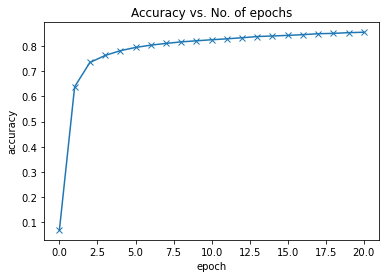

In [177]:
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs')

Label: 4


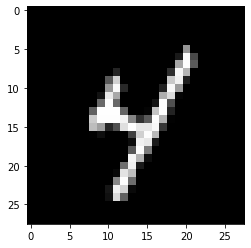

In [183]:
img, label = test_dataset[1580]
plt.imshow(img, cmap='gray')
# print('Shape:', img.shape)
print('Label:', label)

In [184]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

In [187]:
# test_loader = DataLoader(test_dataset, batch_size=256)
# result = evaluate(model, test_loader)
# result

In [186]:
torch.save(model.state_dict(), 'mnist-logistic.ph')